In [10]:
from peak_shave_sim import ConstLimPeakShaveSim
from peak_shave_sim import DynamicLimPeakShaveSim
from util import process_file
from matplotlib.dates import DateFormatter
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 600

In [11]:
config = {
    'delta_limit': 1,
    'LiIonBattery': 3,
    'Flywheel': 3,
    'Supercapacitor': 0,
}
df = process_file('../data/Sub71125.csv')
sim_const = ConstLimPeakShaveSim(config, df)
sim_dyn = DynamicLimPeakShaveSim(config, df)

batteries.py: EnergyHub initialized with config: {'delta_limit': 1, 'LiIonBattery': 3, 'Flywheel': 3, 'Supercapacitor': 0}
batteries.py: EnergyHub initialized with config: {'delta_limit': 1, 'LiIonBattery': 3, 'Flywheel': 3, 'Supercapacitor': 0}


In [12]:
costs_const, powers_const = sim_const.run(margin=0.1848, penalize_charging=True,
                                          create_log=True,verbose=False)
costs_dyn, powers_dyn = sim_dyn.run(lookahead=24, margin=0.0031, penalize_charging=True,
                                    create_log=True)

In [13]:
powers_const = pd.DataFrame(powers_const,
                            columns=['timestamp', 'pnet', 'pbought', 'soc', 'lower', 'upper'])
powers_dyn = pd.DataFrame(powers_dyn,
                          columns=['timestamp', 'pnet', 'pbought', 'soc', 'lower', 'upper'])

In [14]:
print(powers_const.iloc[powers_const['pbought'].idxmax()])
print(powers_dyn.iloc[powers_dyn['pbought'].idxmax()])

timestamp    2021-12-22 17:00:00
pnet                       113.8
pbought                    113.8
soc                          0.0
lower                  50.848703
upper                  73.902776
Name: 1631, dtype: object
timestamp    2021-12-07 07:00:00
pnet                        93.2
pbought                     93.2
soc                   361.900495
lower                    92.7117
upper                    93.2883
Name: 1261, dtype: object


In [15]:
def plot_powers(powers: pd.DataFrame, start, end, title: str = None, fname: str = None) -> None:
    _, axes = plt.subplots(2, 1, sharex=True)
    plt.xlim(start, end)
    axes[0].plot(powers['timestamp'], powers['pnet'], linewidth=2.5, label='pnet')
    axes[0].plot(powers['timestamp'], powers['pbought'], linewidth=2, label='pbought')
    axes[0].plot(powers['timestamp'], powers['upper'], linewidth=1, label='upper')
    axes[0].plot(powers['timestamp'], powers['lower'], linewidth=1, label='lower')

    axes[1].plot(powers['timestamp'], powers['soc'], linewidth=2)
    axes[0].set_ylim(40, 115)
    axes[1].set_ylim(0, 350)

    axes[0].set_ylabel('power (kW)')
    axes[1].set_ylabel('state-of-charge (kWh)')
    axes[1].set_xlabel('time (month, day)')

    axes[1].set_xticklabels(axes[1].get_xticks(), rotation=45)
    fmt = DateFormatter('%b %d.')
    axes[1].xaxis.set_major_formatter(fmt)

    if title is not None:
        axes[0].set_title(title)

    axes[0].grid()
    axes[1].grid()

    if fname is not None:
        plt.savefig(fname, dpi=600, format='png')

/tmp/ipykernel_2839/2983153191.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticks(), rotation=45)
/tmp/ipykernel_2839/2983153191.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticks(), rotation=45)


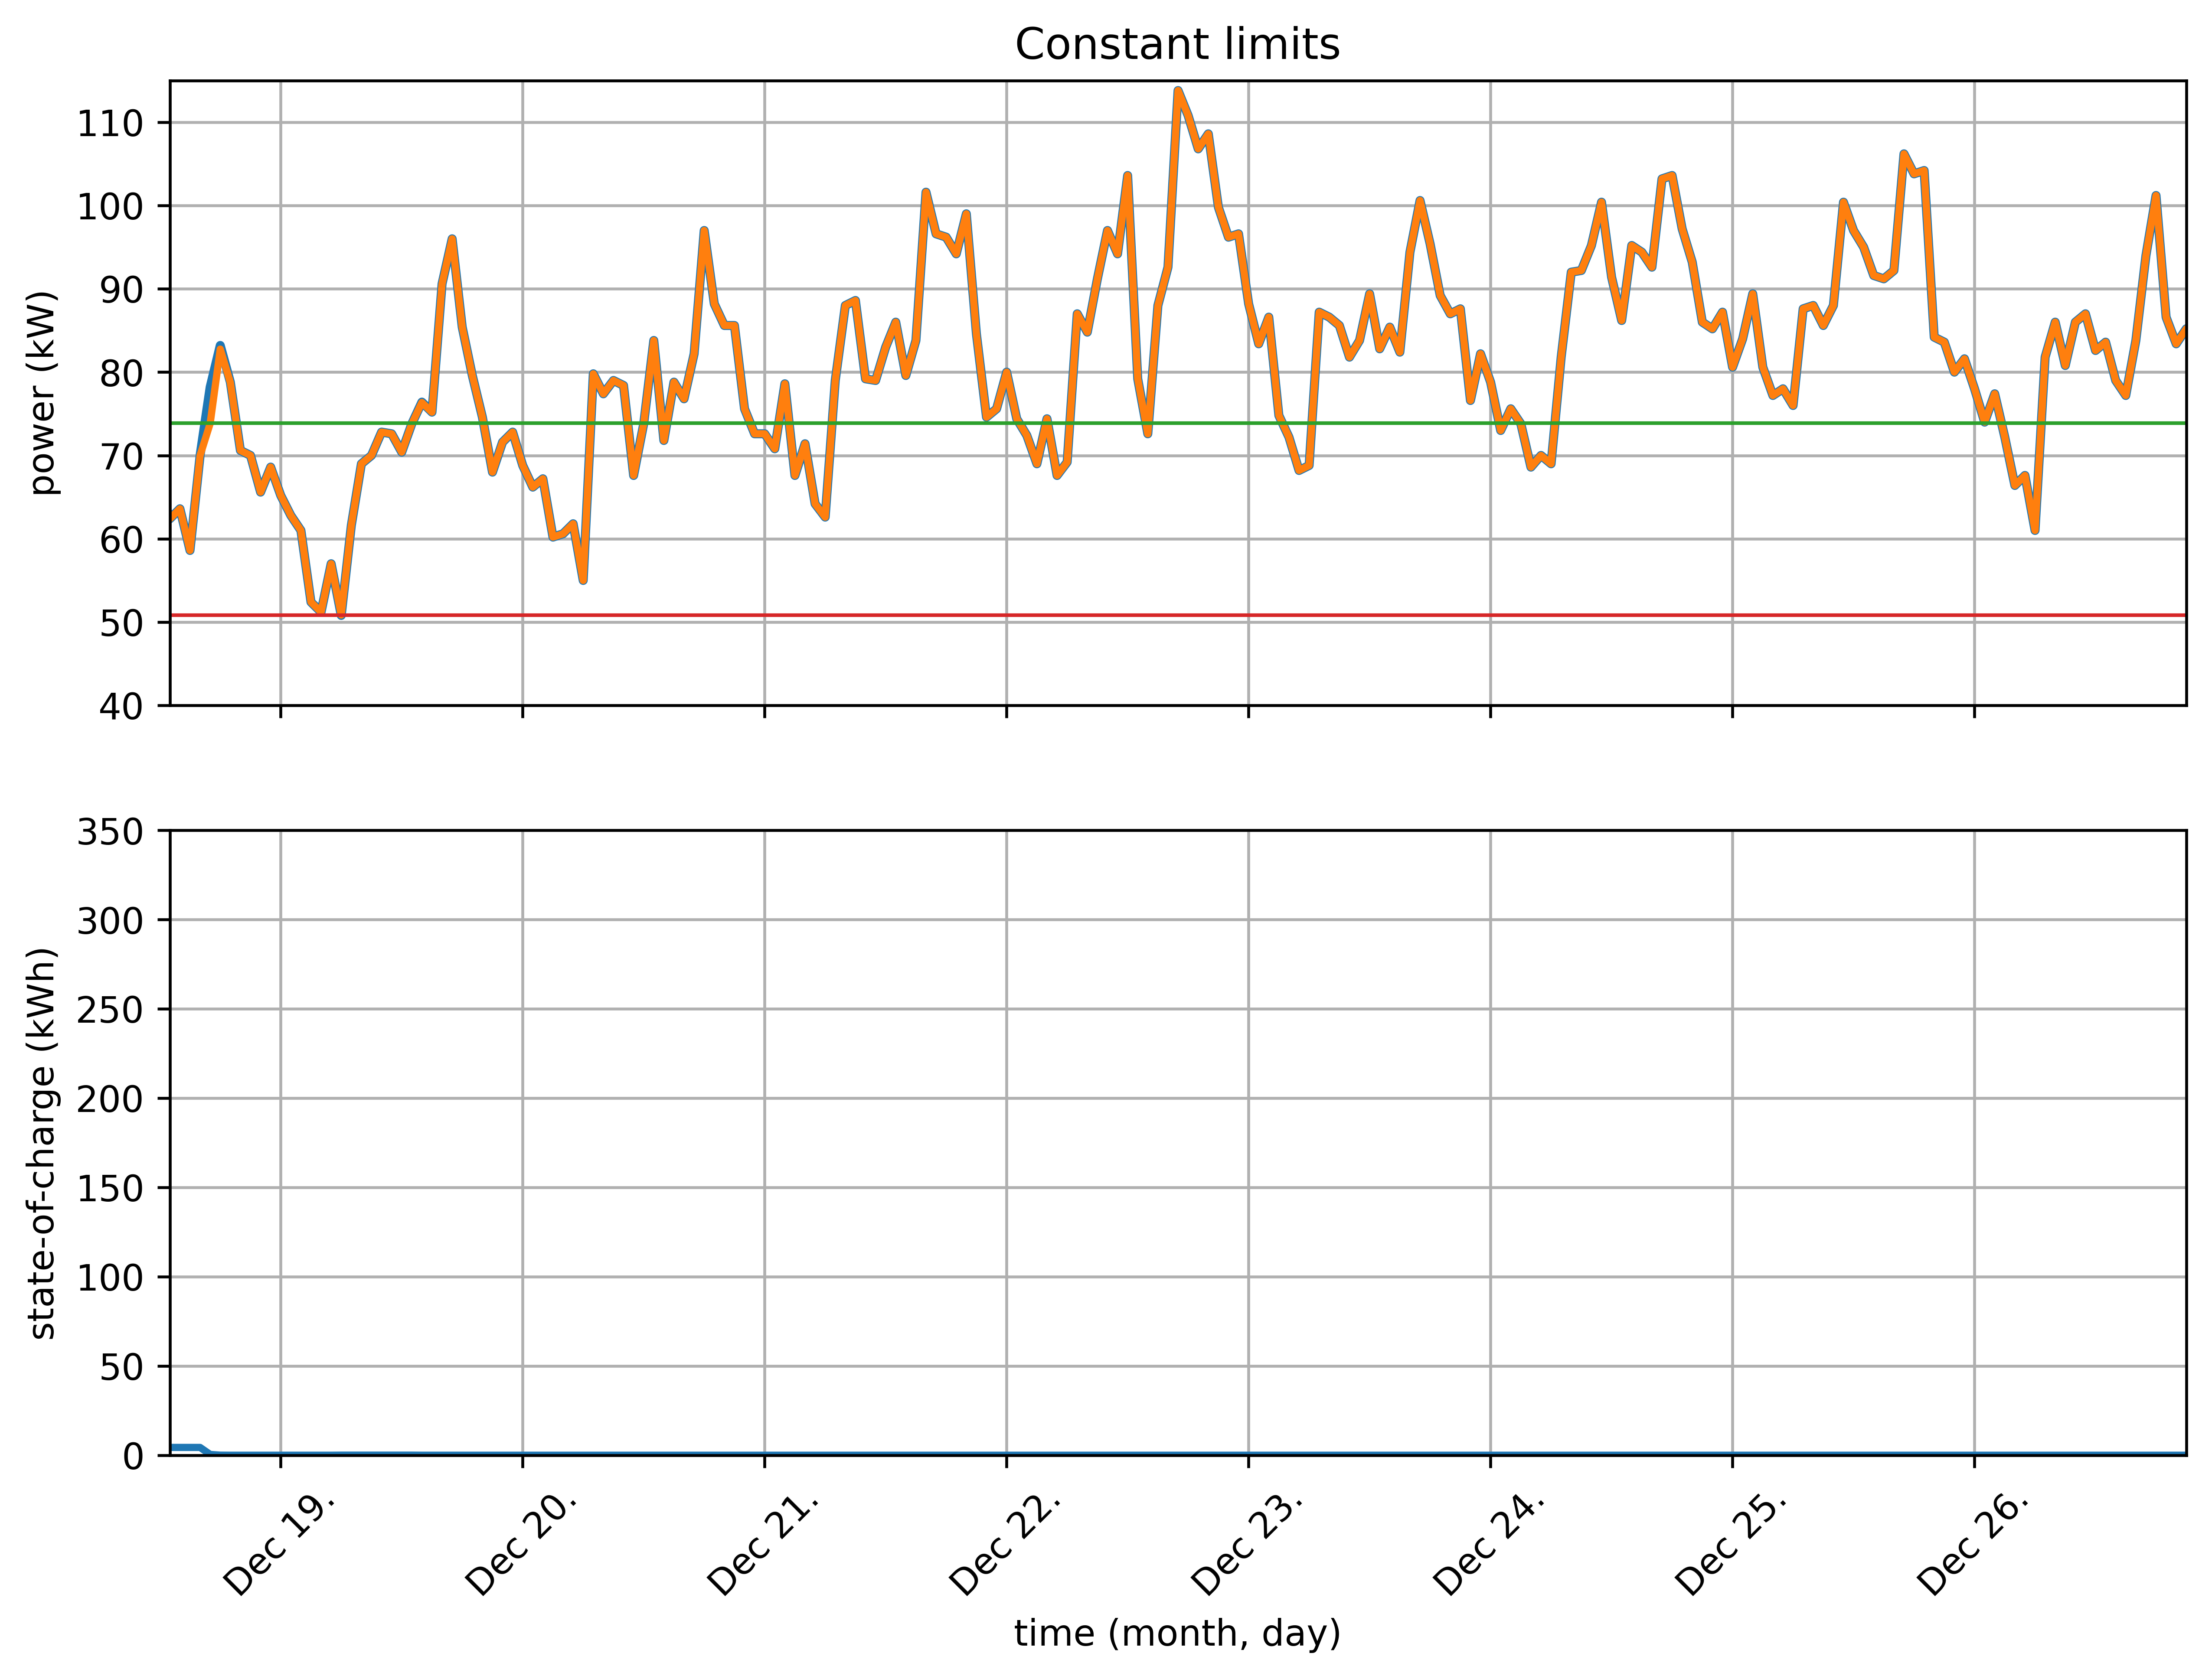

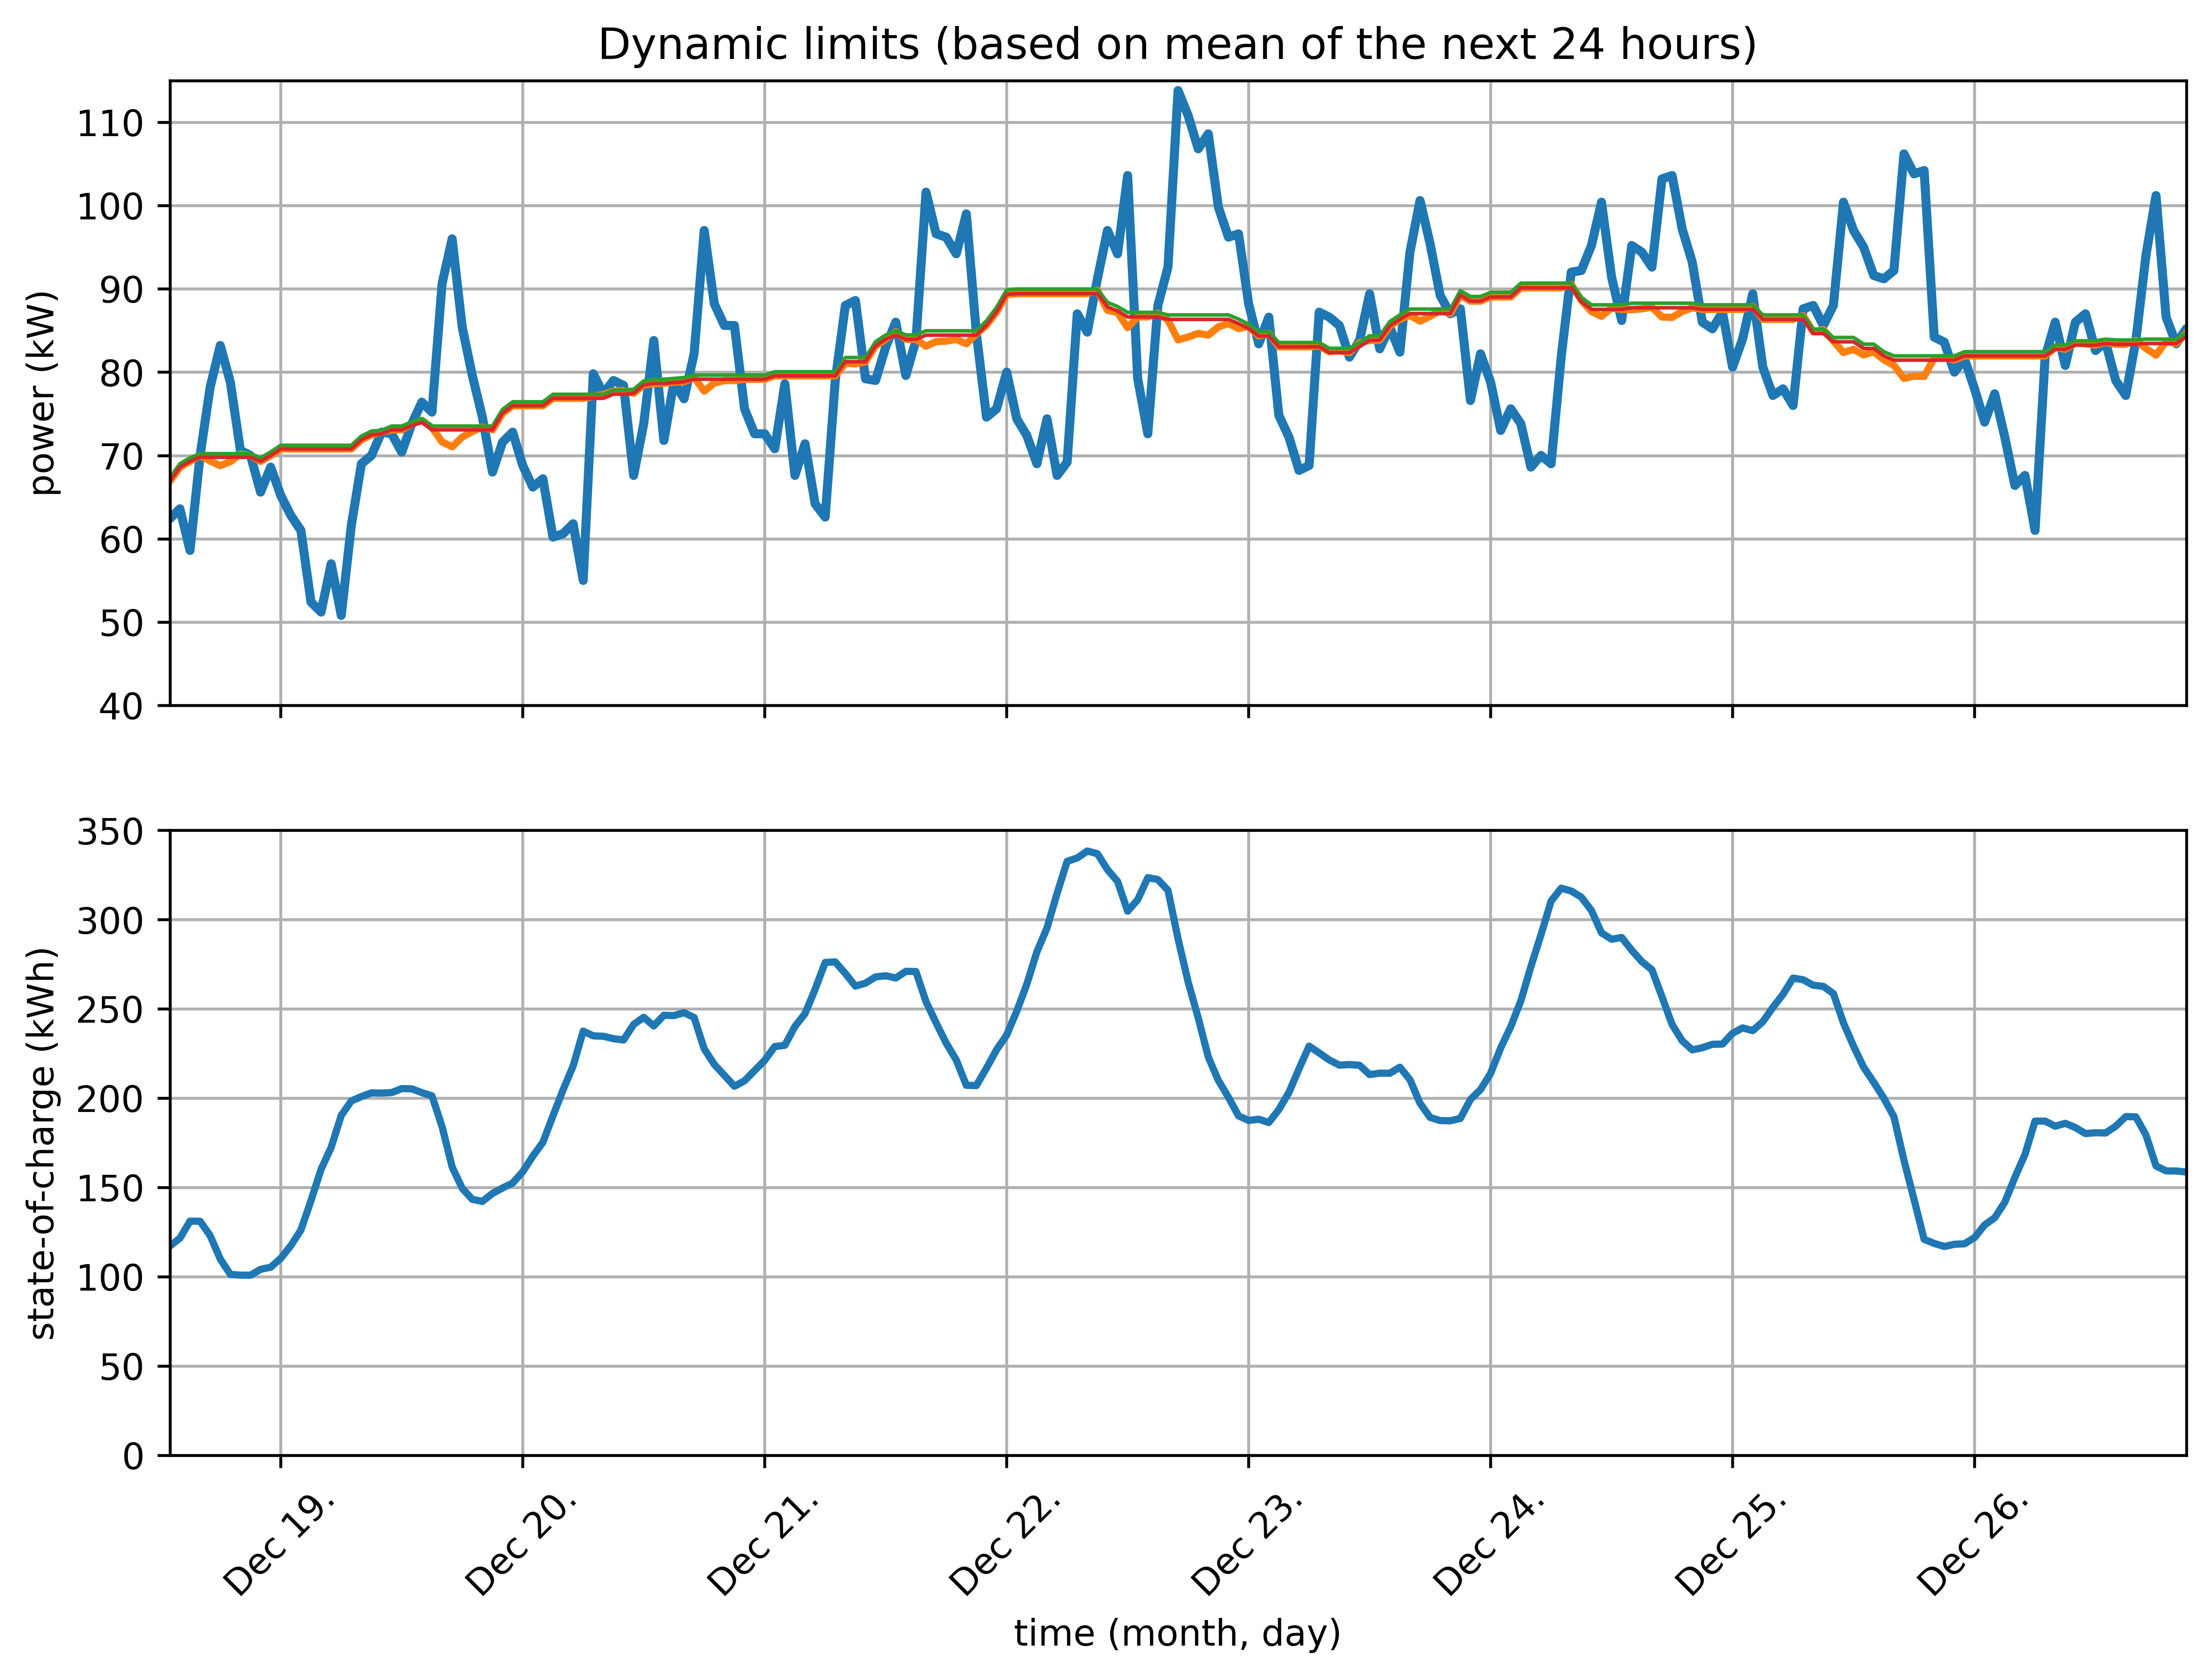

In [16]:
maxpoint = powers_const['pbought'].idxmax()
start = powers_const.iloc[maxpoint - 100]['timestamp']
end = powers_const.iloc[maxpoint + 100]['timestamp']

plot_powers(powers_const, start, end, title='Constant limits', fname='const.png')
plot_powers(powers_dyn, start, end,
            title='Dynamic limits (based on mean of the next 24 hours)',
            fname='dyn.png')